# Aimes Iowa Housing Predictor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from scipy.stats import pearsonr
os.chdir('/Users/gil/notebooks/DSI-US-4/Project2')
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Initial Data Review and Cleaning

In [3]:
house = pd.read_csv('./train.csv')

In [4]:
house.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
with pd.option_context("display.max_rows", 100):
    display(house.isnull().sum())


Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
house.shape

(2051, 81)

In [7]:
with pd.option_context("display.max_columns", 100):
    display(house.head())

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

### The Pool QC and Pool Area Column are combined into 1 column named HasPool, this is because their are only 9 rows with pools and it has a better chance of being statistically significant later on.

In [8]:
house = house.drop(columns=['Pool QC'])

In [9]:
house['Pool Area'].value_counts()
    

0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

In [10]:
house = house.rename(columns={'Pool Area': 'HasPool'})
house['HasPool'] = np.where(house['HasPool']>0, 1, 0)

### The Fireplace Qu Column has 1k missing values, when comparing it to the Fireplaces column and looking the the values that Fireplace Qu can hold I made the determination that whenever their were missing values it was because there wasnt a fireplace on that property.  

In [11]:
house['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [12]:
x = {'Fireplace Qu':'NA'}
house = house.fillna(value=x)

### Its the same thing for Fence Values their are no NA assigned instead its has a ton of null values, its pretty safe to assume null values in the column were suppost to have the NA value instead.

In [13]:
house['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [14]:
x = {'Fence':'NA'}
house = house.fillna(value=x)

### The Misc Features column has a data dictionary value of 'NA' but has 1986 null values and no rows with the 'NA' value.  In addition every column with a null value in the Misc Feature column also has a Misc Val of 0 (which is the value of any misc features on the house).  It seems pretty safe to set all null misc features to 'NA'

In [15]:
house['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [16]:
temp = house[house['Misc Val']==0]

In [17]:
temp['Misc Feature'].unique()

array([nan], dtype=object)

In [18]:
x = {'Misc Feature':'NA'}
house = house.fillna(value=x)

### According to the data dictionary the Alley Column should have 3 values NA, Pave and Grvl.  It has a ton of Null values and only Pave ad Grvl as unique values.  Its pretty easy to assume the missing values are NA.

In [19]:
house['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [20]:
x = {'Alley':'NA'}
house = house.fillna(value=x)

### The MS Subclass Column has numerical data when it should be categorical, luckily its all in integers so ill be able to dummy it out and rename the columns later.

In [21]:
house['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

### All of the rows with null Vnr Type also had null Vnr area, its pretty safe to assume those houses dont have Masonry veneer's.


In [22]:
house['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [23]:
x = {'Mas Vnr Type':'None'}
house = house.fillna(value=x)

In [24]:
x = {'Mas Vnr Area':0}
house = house.fillna(value=x)

### After an exhaustive search I cannot compare the null values in the Lot Frontage column to anyithing, as a result I am going to drop the column from my data over dropping 330 rows.  In revision I can consider just applying the minimum value to nulls instead of dropping it.

In [25]:
house = house.drop(columns=['Lot Frontage'])

### Since both null values dont have basements its pretty safe to assume they also dont have basement bathrooms so I set the null values in Bsmt Full Bath and Bsmt Half Bath to 0.

In [26]:
house['Bsmt Full Bath'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [27]:
x = {'Bsmt Full Bath':0}
house = house.fillna(value=x)

In [28]:
x = {'Bsmt Half Bath':0}
house = house.fillna(value=x)

### There is 1 row with a garage type but no garage information besides that, I am dropping that row.

In [29]:
house = house.drop(house.index[1712])

### The null values in Garage Qual Garage Cond Garage Finish Garage Yr Blt Garage Type columns also have a garage area of 0, its pretty safe to assume that these houses dont have garages so im going to set those values to either 0 or NA depending on what the data dictionary calls for.  The Garage Yr Blt column is numerical, for the null values (since it has no garage I would need to recast the column as categorical which would be extremely fitting for my model so im going to drop that column)

In [30]:
temp = house[house["Garage Type"].isnull()]

In [31]:
temp['Garage Cars'].mean()

0.0

In [32]:
temp['Garage Area'].mean()

0.0

In [33]:
house = house.drop(columns=['Garage Yr Blt'])

In [34]:
x = {'Garage Type':'NA'}
house = house.fillna(value=x)

In [35]:
x = {'Garage Finish':'NA'}
house = house.fillna(value=x)

In [36]:
x = {'Garage Qual':'NA'}
house = house.fillna(value=x)

In [37]:
x = {'Garage Cond':'NA'}
house = house.fillna(value=x)

### The basement categories have a ton of mixed null values for different reasons.

#### First I dropped the row 1327 because it had no basement information at all including area or sqft, so I couldnt make the determination what was going on.

In [38]:
house = house.drop(house.index[1327])

In [39]:
temp = house[house["Bsmt Exposure"].isnull()]

In [40]:
with pd.option_context("display.max_columns", 100):
    display(temp[temp['Bsmt Unf SF']>0])

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley Lot Shape  \
1456  1797  528458090           60        FV     10411   Pave    NA       Reg   
1547    67  528445060           20        RL      8987   Pave    NA       Reg   
1997  2780  907194130           60        RL     14006   Pave    NA       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1456          Lvl    AllPub     Corner        Gtl      Somerst        Norm   
1547          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1997          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1456        Norm      1Fam      2Story             5             5   
1547        Norm      1Fam      1Story             8             5   
1997        Norm      1Fam      2Story             7             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1456        2007            2007      Gable   CompShg      VinylSd   
1547        2005            2006      Gable   CompShg      VinylSd   
1997        2002            2002      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1456      VinylSd         None           0.0         Gd         TA     CBlock   
1547      VinylSd      BrkFace         226.0         Gd         TA      PConc   
1997      VinylSd      BrkFace         144.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1456            Unf           0.0        725.0          725.0    GasA   
1547            Unf           0.0       1595.0         1595.0    GasA   
1997            Unf           0.0        936.0          936.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1456         Ex           Y      SBrkr         725         863   
1547         Ex           Y      SBrkr        1595           0   
1997         Ex           Y      SBrkr         936         840   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1456                0         1588             0.0             0.0          3   
1547                0         1595             0.0             0.0          2   
1997                0         1776             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1456          0              3              1           Gd              8   
1547          0              2              1           Gd              6   
1997          1              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Finish  \
1456        Typ           0           NA      Attchd           Unf   
1547        Typ           1           Gd      Attchd           RFn   
1997        Typ           1           TA      Attchd           RFn   

      Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  \
1456          2.0        561.0          TA          TA           Y   
1547          3.0        880.0          TA          TA           Y   
1997          2.0        474.0          TA          TA           Y   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
1456             0              0               0           0             0   
1547           144              0               0           0             0   
1997           144             96               0           0             0   

      HasPool Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  \
1456        0    NA           NA         0        7  

#### Its likely that the 3 above rows have a basement with no exposure because they have other qualities of a basement (including area) so im going to set those rows to 'No'.

In [41]:
house.at[1456, 'Bsmt Exposure'] = 'No'

In [42]:
house.at[1547, 'Bsmt Exposure'] = 'No'

In [43]:
house.at[1997, 'Bsmt Exposure'] = 'No'

In [44]:
temp = house[house["BsmtFin Type 2"].isnull()]

In [45]:
with pd.option_context("display.max_columns", 100):
    display(temp[temp['Bsmt Unf SF']>0])

Id        PID  MS SubClass MS Zoning  Lot Area Street Alley Lot Shape  \
1147  445  528142130           20        RL     10655   Pave    NA       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1147          Lvl    AllPub     Inside        Gtl      NridgHt        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1147        Norm      1Fam      1Story             8             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1147        2003            2004      Gable   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1147      VinylSd      BrkFace         296.0         Gd         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1147            NaN         479.0       1603.0         3206.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1147         Ex           Y      SBrkr        1629           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1147                0         1629             1.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1147          0              3              1           Gd              7   

     Functional  Fireplaces Fireplace Qu Garage Type Garage Finish  \
1147        Typ           1           Gd      Attchd           RFn   

      Garage Cars  Garage Area Garage Qual Garage Cond Paved Drive  \
1147          3.0        880.0          TA          TA           Y   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
1147             0              0               0           0             0   

      HasPool Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  \
1147        0    NA           NA         0       10     2009       WD    

      SalePrice  
1147     284000

#### So we know there is a second finished area to the above row because of the BsmtFin SF 2 column having an area.  So we need to set the finish type to a quality that isnt NA or No.  I am choosing the lowest quality so that my model doesnt over inflate the price as much.

In [46]:
house.at[1147, 'BsmtFin Type 2'] = 'LwQ'

In [47]:
x = {'Bsmt Qual':'NA'}
house = house.fillna(value=x)

#### The remaining 54 Nulls in each column have an area of 0 and similarly to the rest of this dataset are missing the 'NA' value from their unique values while having that option in the data dictionary, so im filling in with NA's

In [48]:
house['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'NA', 'Ex', 'Po'], dtype=object)

In [49]:
x = {'Bsmt Cond':'NA'}
house = house.fillna(value=x)

In [50]:
house['Bsmt Cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po', 'Ex'], dtype=object)

In [51]:
x = {'Bsmt Exposure':'NA'}
house = house.fillna(value=x)

In [52]:
house['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'NA', 'Mn'], dtype=object)

In [53]:
x = {'BsmtFin Type 1':'NA'}
house = house.fillna(value=x)

In [54]:
house['BsmtFin Type 1'].unique()

array(['GLQ', 'Unf', 'ALQ', 'Rec', 'NA', 'BLQ', 'LwQ'], dtype=object)

In [55]:
x = {'BsmtFin Type 2':'NA'}
house = house.fillna(value=x)

In [56]:
house['BsmtFin Type 2'].unique()

array(['Unf', 'Rec', 'NA', 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

#### 2 of my columns are categorical but are represented as numbers (Month Sold and MS Subclass) I am going to cast those columns as strings in order to dummy them and 2 of the remaining columns in my dataset are ID columns that I cant use to correlate and run regression through.

In [57]:
house = house.drop(columns=['Id'])

In [58]:
house = house.drop(columns=['PID'])

In [59]:
house['Mo Sold'] = house['Mo Sold'].astype(str)

In [60]:
house['MS SubClass'] = house['MS SubClass'].astype(str)

### Sqeaky Clean

In [61]:
with pd.option_context("display.max_rows", 100):
    display(house.isnull().sum())

MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

## Create Dummy Columns and Scale my data!

#### Creating 2 different dataframes one for categorical and one for numerical columns then dummying the categorical columns.

In [62]:
house_cat = house[['MS SubClass','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating','Heating QC','Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Fence','Misc Feature','Sale Type','Mo Sold']].copy()

In [63]:
house_num = house[['Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Garage Area','Wood Deck SF','Enclosed Porch','3Ssn Porch','Screen Porch','HasPool','Misc Val','Yr Sold']].copy() 

### Used Standard Scaler to scale my numerical data

In [64]:
scaler = StandardScaler()
scaler.fit(house_num)
StandardScaler(copy=True, with_mean=True, with_std=True)
temp = scaler.fit_transform(house_num)
house_scaled_num = pd.DataFrame(temp, index=house_num.index, columns=house_num.columns)


### Created Dummies from the categorical data set with `pd.get_dummies(house_cat)`

In [65]:
dum_house_cat = pd.get_dummies(house_cat)

#### Concated the 2 dataframes back together and added the sale price column from the original column to do a correlation comparison.

In [66]:
house_mod = pd.concat([house_scaled_num, dum_house_cat], axis=1)
house1_mod = pd.concat([house_scaled_num, dum_house_cat], axis=1)

In [67]:
y = house['SalePrice']


In [68]:
house_mod['SalePrice'] = house['SalePrice']

### Generated a correlation table and sorted it by the target column to see which features are highely corrlated to the target

In [69]:
house_mod.corr().sort_values('SalePrice')

Lot Area  Overall Qual  Overall Cond  Year Built  \
Exter Qual_TA        -0.050789     -0.646110      0.210213   -0.591103   
Kitchen Qual_TA      -0.083179     -0.568358      0.073323   -0.479772   
Fireplace Qu_NA      -0.203882     -0.433870      0.034372   -0.237679   
Bsmt Qual_TA         -0.078960     -0.471801      0.299863   -0.635826   
Garage Finish_Unf    -0.059573     -0.429843      0.212724   -0.521294   
Mas Vnr Type_None    -0.086770     -0.406564      0.136625   -0.408045   
Garage Type_Detchd   -0.165155     -0.340580      0.194610   -0.493068   
Foundation_CBlock     0.066811     -0.408467      0.190339   -0.298661   
Heating QC_TA        -0.003549     -0.350328      0.001455   -0.308944   
Lot Shape_Reg        -0.243098     -0.260548      0.066647   -0.285842   
Bsmt Exposure_No     -0.175797     -0.205518      0.100712   -0.244295   
MS Zoning_RM         -0.221436     -0.192638      0.135902   -0.404239   
Central Air_N        -0.057265     -0.296211     -0.129437   -0.374596   
Paved Drive_N        -0.002632     -0.308132      0.003808   -0.415108   
Roof Style_Gable     -0.115164     -0.178656      0.002665   -0.056453   
MS SubClass_30       -0.065701     -0.260112      0.025140   -0.338931   
Garage Cond_NA       -0.086083     -0.247221     -0.033730   -0.231036   
Garage Finish_NA     -0.086083     -0.247221     -0.033730   -0.231036   
Garage Type_NA       -0.086083     -0.247221     -0.033730   -0.231036   
Garage Qual_NA       -0.086083     -0.247221     -0.033730   -0.231036   
Foundation_BrkTil    -0.079726     -0.191320      0.169207   -0.559428   
Sale Type_WD         -0.026201     -0.197072      0.159630   -0.203904   
Neighborhood_OldTown -0.070977     -0.180321      0.185404   -0.475610   
Electrical_FuseA     -0.023989     -0.218911     -0.000024   -0.303824   
House Style_1.5Fin   -0.023317     -0.201830      0.111297   -0.415239   
Exterior 1st_Wd Sdng  0.044428     -0.165975      0.140876   -0.394042   
Neighborhood_NAmes   -0.001614     -0.231433      0.092519   -0.162974   
Neighborhood_IDOTRR  -0.047210     -0.200159     -0.007809   -0.267998   
MS SubClass_50       -0.019602     -0.191775      0.103024   -0.400271   
Neighborhood_Edwards  0.016083     -0.193825     -0.014325   -0.139690   
...                        ...           ...           ...         ...   
Exterior 2nd_VinylSd  0.000754      0.363447     -0.182928    0.511668   
Exterior 1st_VinylSd -0.008175      0.373602     -0.186161    0.521366   
MS SubClass_60        0.096619      0.318095     -0.139208    0.389504   
Garage Type_Attchd    0.157875      0.363647     -0.110427    0.466844   
Sale Type_New         0.042400      0.335311     -0.141331    0.336209   
Bsmt Exposure_Gd      0.226110      0.286365     -0.057595    0.195455   
Fireplace Qu_Gd       0.111771      0.355309     -0.013718    0.125007   
Garage Finish_Fin     0.099413      0.400980     -0.139797    0.405372   
BsmtFin SF 1          0.215451      0.278875     -0.045815    0.275800   
Exter Qual_Gd         0.013014      0.538856     -0.173692    0.560332   
Neighborhood_NridgHt  0.047663      0.382104     -0.127885    0.280711   
Heating QC_Ex         0.020871      0.468664     -0.054109    0.461645   
BsmtFin Type 1_GLQ    0.024973      0.458661     -0.157344    0.499884   
Fireplaces            0.289272      0.388326     -0.005700    0.167941   
Exter Qual_Ex         0.110839      0.410732     -0.050945    0.205335   
Mas Vnr Area          0.167352      0.429778     -0.131519    0.320410   
TotRms AbvGrd         0.238407      0.381284     -0.092629    0.137109   
Foundation_PConc     -0.016479      0.572218     -0.283449    0.667163   
Full Bath             0.125408      0.515179     -0.218860    0.480929   
Year Remod/Add        0.050381      0.584594      0.043564    0.629989   
Kitchen Qual_Ex       0.115528      0.446570     -0.058780    0.227757   
Year Built            0.035663      0.602635     -0.370603    1.000000   
Bsmt Qual_Ex          0.09

# Model 1 MLR using correlation (BAD)

#### Created a list that had the most correlated features in index order.

In [82]:
corr = pd.DataFrame(house_mod.corr())  

In [83]:
corr = abs(corr)

In [84]:
corr = corr.sort_values('SalePrice',ascending=False)

In [85]:
corr = corr.drop(corr.index[0]) 

In [86]:
x = corr['SalePrice'].index

### Created a for loop that went through my features from most correlated to least to generate the best R2 score.

In [75]:
X = house_mod
y = house['SalePrice']

columns = x[0:60]
regression = linear_model.LinearRegression()
model = regression.fit(X[columns], y)
print(model.score(X[columns], y))
y_hat = model.predict(X[columns])
metrics.mean_squared_error(y, y_hat)**.5

0.8720688959983384


28343.123992581655

In [76]:
for i in range(1,100):
    columns = x[0:i]
    unfitted_lr = linear_model.LinearRegression()
    print(cross_val_score(unfitted_lr, X[columns], y, cv=5).mean())

0.6394895892257555
0.7274730317624389
0.7570346418839623
0.7562508662157277
0.772828953925524
0.7738495281961237
0.779860054484997
0.8051473632536407
0.8098991657189505
0.8203516003082931
0.8223861112506187
0.8229217363269156
0.8220794527643831
0.8217645347025891
0.8211569698690079
0.8227789966731358
0.8246307016703174
0.8297477475101116
0.8304315038717534
0.83231368247839
0.8322690048796441
0.8324064362082242
0.8330281397149092
0.8333654911655481
0.8342152876851356
0.8351405815800177
0.8347624068014454
0.8355305576967205
0.8354017769555326
0.8392780163611263
0.8396356143200248
0.8399490291176729
0.8400888986126164
0.8401999316016037
0.8398103965054087
0.8401133172121883
0.8398515113863574
0.8399793797890229
0.8405011876864428
0.840266620108002
0.840957482020188
0.8408734075711994
0.8414761137546778
0.8418678743497233
0.842310272081155
0.8439326583029583
0.8438160137071827
0.8456928748201389
0.845468302692073
0.8454683026920728
0.8455412505424149
0.8455675689317493
0.8451582659524342
0

### Took my best R2 Score from the cross validation, added in the other dummied columns that were missing -1, and eliminated several highly correlated features (to each other not to my target) . This took forever and was fruitless unfortunately.

In [103]:
X = house_mod
y = house['SalePrice']

columns = x[0:20]

regression = linear_model.LinearRegression()
model = regression.fit(X[columns], y)
print(model.score(X[columns], y))
y_hat = model.predict(X[columns])
metrics.mean_squared_error(y, y_hat)**.5

0.8424314627514192


31455.34077433861

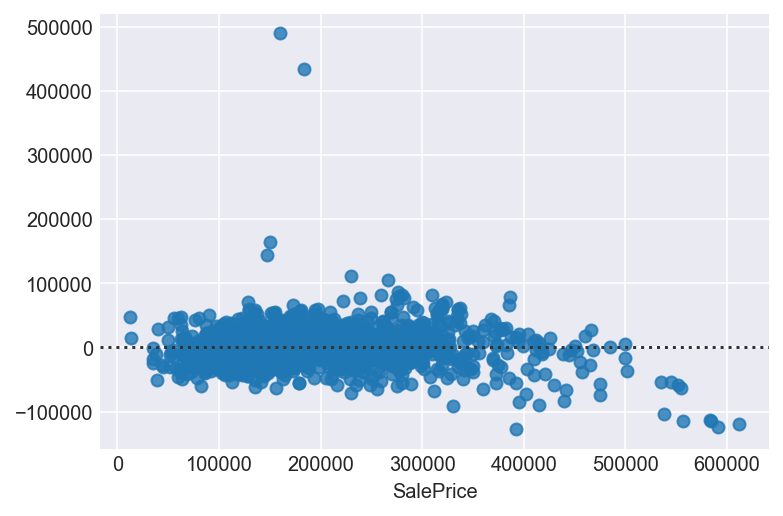

In [108]:
sns.residplot(y,y_hat)

# At this point I realized my test data was not cleaned, so I opened a new sheet, cleaned it and exported it as a CSV.

### Generated my first submission by importing the cleaned test CSV running a predict on it with my Linear Regression model fitted with the highest cross validated score.  Took the best Cross Validated Score, added in missing dummy columns -1, and eliminated 1 of each high correlated feature (to each other).

In [ ]:
house_clean = pd.read_csv('./test_filtered.csv')

In [ ]:
tst = pd.read_csv('./test.csv')

In [ ]:
y_hat = model.predict(house_clean[columns])

In [ ]:
submission['Id'] = tst['Id']

In [ ]:
submission['SalePrice'] = y_hat

In [ ]:
submission.to_csv('submission.csv',index= False)

# Model 2 Elastic Net Better

#### The Elastic Netted Linear Regression performs much better, however with a .99 ratio I should probably have just lassoed to eliminate features.

In [109]:
X = house1_mod

In [110]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = .99
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X, y)

In [111]:
enet_model.score(X,y)

0.9164916084904587

In [112]:
enet_optimal_alpha = enet_model.alpha_
enet_optimal_alpha

0.5

In [113]:
y_hat = enet_model.predict(X)

In [114]:
metrics.mean_squared_error(y, y_hat)**.5

22899.431576465762

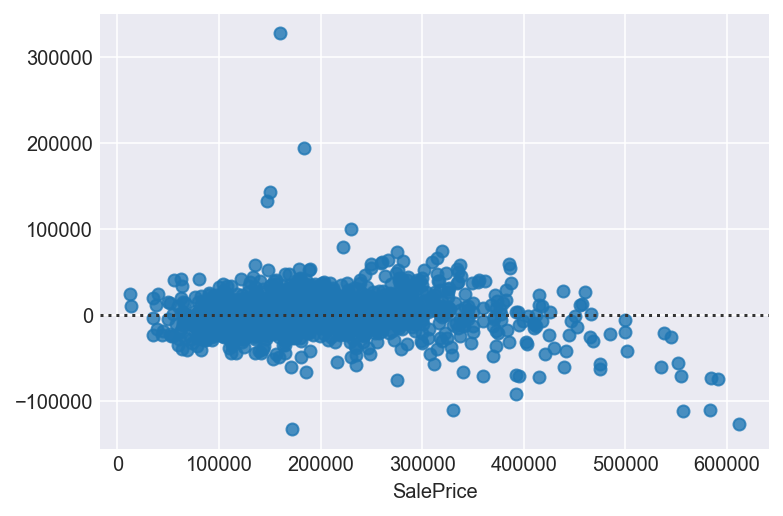

In [115]:
sns.residplot(y,y_hat)

## My Test and Train DataFrames did not have matching columns, I needed to drop some columns before elastic netting to compesate for that.  

In [306]:
house_clean = house_clean.drop(columns=['Unnamed: 0'])

In [307]:
house_clean = house_clean.drop(columns=['Roof Matl_Metal' ,'Roof Matl_Roll' ,'Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast' ,'Mas Vnr Type_CBlock', 'Heating_Floor', 'Kitchen Qual_Po' ,'Sale Type_VWD'])

In [308]:
g = list(house_clean.columns)

In [310]:
XV2 = X[g]

In [311]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = .99
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(XV2, y)

In [312]:
enet_model.score(XV2,y)

0.9131434491264626

In [313]:
y_hat = enet_model.predict(XV2)

In [314]:
metrics.mean_squared_error(y, y_hat)**.5

23353.981533763046

In [316]:
y_hat2 = enet_model.predict(house_clean)

In [317]:
submission['Id'] = tst['Id']

In [318]:
submission['SalePrice'] = y_hat2

In [319]:
submission.to_csv('submission1.csv',index= False)

# Model 3 Ridge Statistically Significant P-Values (.05) Best

#### First I need to generate a Correlation and Pvalue Table 

In [ ]:
pearsonr(df_clean['column1'], df_clean['column2'])

In [355]:
templist= []
for i in X.columns:
    templist.append(pearsonr(X[i],X['SalePrice']))


In [356]:
correlation = [i[0]for i in templist]

In [357]:
pvalue1 = [i[1]for i in templist]

In [358]:
pvalue = pd.DataFrame({'Corr':correlation})

In [359]:
pvalue['pvalue'] = pvalue1

In [360]:
feature = list(X.columns)

In [361]:
pvalue['feature']=feature

In [362]:
pvalue =pvalue.sort_values('pvalue',ascending = True)

In [391]:
pvalue.head()

Corr         pvalue       feature
315  1.000000   0.000000e+00     SalePrice
1    0.800028   0.000000e+00  Overall Qual
13   0.697032  5.020111e-298   Gr Liv Area
23   0.650097  1.925846e-246   Garage Area
22   0.648007  2.343689e-244   Garage Cars

In [ ]:
df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

In [433]:
sig = pvalue.loc[(pvalue['pvalue'] < .05) & (abs(pvalue['Corr'])>.3)]

In [434]:
sig['feature'].values

array(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA',
       'Bsmt Qual_Ex', 'Year Built', 'Kitchen Qual_Ex', 'Year Remod/Add',
       'Kitchen Qual_TA', 'Full Bath', 'Foundation_PConc',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Exter Qual_Ex',
       'Fireplace Qu_NA', 'Fireplaces', 'BsmtFin Type 1_GLQ',
       'Bsmt Qual_TA', 'Heating QC_Ex', 'Neighborhood_NridgHt',
       'Exter Qual_Gd', 'Garage Finish_Unf', 'BsmtFin SF 1',
       'Garage Finish_Fin', 'Mas Vnr Type_None', 'Fireplace Qu_Gd',
       'Bsmt Exposure_Gd', 'Garage Type_Detchd', 'Sale Type_New',
       'Garage Type_Attchd', 'Foundation_CBlock', 'MS SubClass_60',
       'Heating QC_TA', 'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd',
       'Wood Deck SF', 'Mas Vnr Type_Stone', 'Lot Shape_Reg',
       'Kitchen Qual_Gd'], dtype=object)

### Basic Linear Regression using only correlated and statistically significant features

In [132]:
X = house_mod
y = house['SalePrice']

columns = ['Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA',
       'Bsmt Qual_Ex', 'Year Built', 'Kitchen Qual_Ex', 'Year Remod/Add',
       'Kitchen Qual_TA', 'Full Bath', 'Foundation_PConc',
       'TotRms AbvGrd', 'Mas Vnr Area', 'Exter Qual_Ex',
       'Fireplace Qu_NA', 'Fireplaces', 'BsmtFin Type 1_GLQ',
       'Bsmt Qual_TA', 'Heating QC_Ex', 'Neighborhood_NridgHt',
       'Exter Qual_Gd', 'Garage Finish_Unf', 'BsmtFin SF 1',
       'Garage Finish_Fin', 'Mas Vnr Type_None', 'Fireplace Qu_Gd',
       'Bsmt Exposure_Gd', 'Garage Type_Detchd', 'Sale Type_New',
       'Garage Type_Attchd', 'Foundation_CBlock', 'MS SubClass_60',
       'Heating QC_TA', 'Exterior 1st_VinylSd', 'Exterior 2nd_VinylSd',
       'Wood Deck SF', 'Mas Vnr Type_Stone', 'Lot Shape_Reg',
       'Kitchen Qual_Gd']
regression = linear_model.LinearRegression()
model = regression.fit(X[columns], y)
print(model.score(X[columns], y))
y_hat = model.predict(X[columns])
metrics.mean_squared_error(y, y_hat)**.5

0.8558569717313542


30085.44667152931

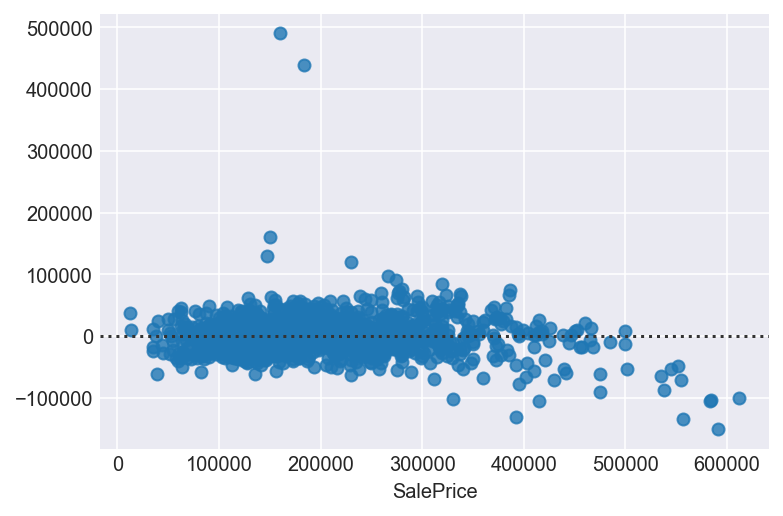

In [135]:
sns.residplot(y,y_hat)

In [126]:
unfitted_lr = linear_model.LinearRegression()
cross_val_score(unfitted_lr, X[columns], y, cv=5).mean()

0.8408734075711994

### Elastic Net using correlated features

In [137]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = .9
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(X[columns], y)

In [138]:
y_hat = enet_model.predict(X[columns])
y_hat

array([185407.08262332, 232287.24576647, 125826.55506948, ...,
       156916.54016917, 119965.75834928, 202773.8388038 ])

In [140]:
enet_model.score(X[columns],y)

0.8507269060448492

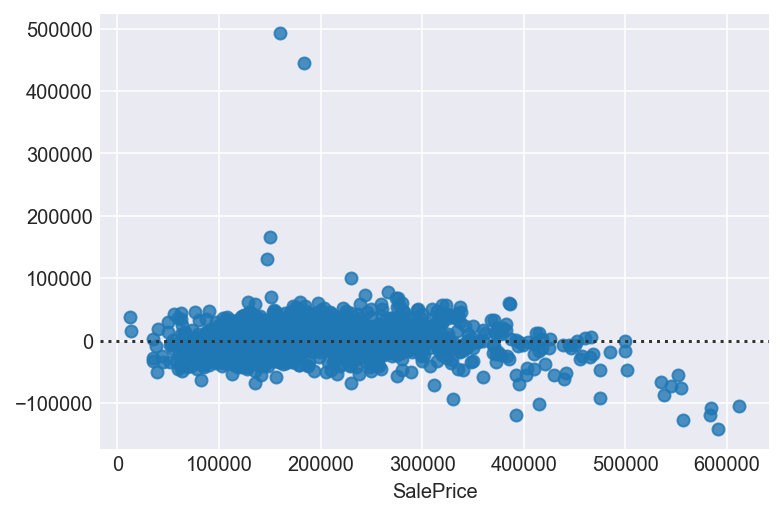

In [139]:
sns.residplot(y,y_hat)

In [423]:
X_test = house_clean[columns]

In [424]:
PredictM3= enet_model.predict(X_test)

In [425]:
submission['Id'] = tst['Id']

In [426]:
submission['SalePrice'] = PredictM3

In [427]:
submission.to_csv('Final.csv',index= False)

## Ways to Improve my models:
### Combine test and train CSV and clean/regularize/filter together so the number of columns and features in each stays the same.  
### A few of my numerical columns should have been cast as dummy columns and then grouped/groomed to create effective features(ex overall quality 1-10 the difference between 1-2 may not be the same as 9-10 but currently they are weighted the same)
### Look at my targeted features that have significant p-values, if they are highly correlated with another feature, drop the one with the correlation closer to 0.  (85% + correlation)
### Group categorical data into fewer columns that are more relevent to my data (ex if being in excellent condition effects the price but the other 3 qualities dont, just make 2 features instead of 4) Then rerun my pvalue/correlation to do better selection.